In [ ]:
from google.colab import files
uploaded = files.upload()

Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test (1).csv
Saving train.csv to train.csv


**Load the Dataset:**Use Pandas to load and explore the dataset.

In [ ]:
# 1. Importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot styles
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 2. Load the Dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Display the first few rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**DATA CLEANING:**Handle missing values using imputation techniques or removal,remove duplicates.

In [ ]:
# Check for missing values
df.isnull().sum()

# Fill missing Age with median, Embarked with mode, drop Cabin (too many missing)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Detect and handle outliers using IQR method on 'Fare' and 'Age'
for col in ['Fare', 'Age']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]


**Visualizations**

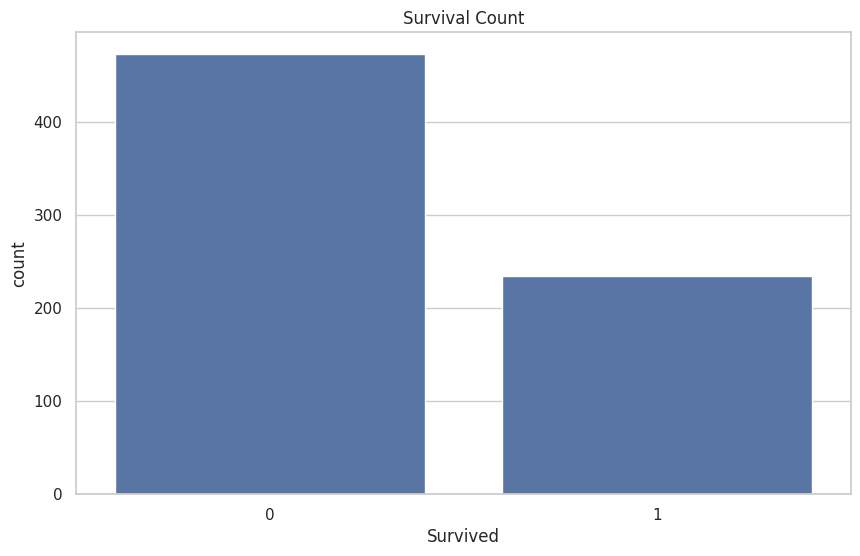

In [ ]:
# Bar chart: Survival count
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

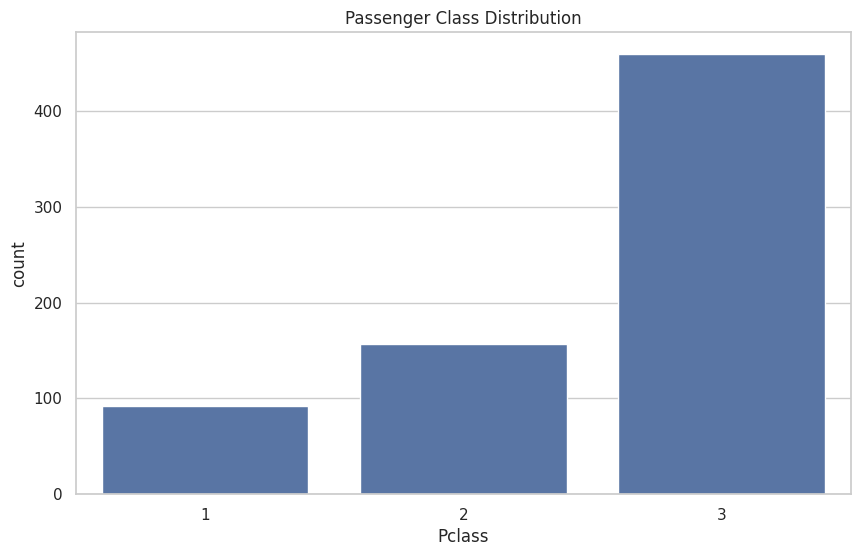

In [ ]:
# Bar chart: Pclass distribution
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()

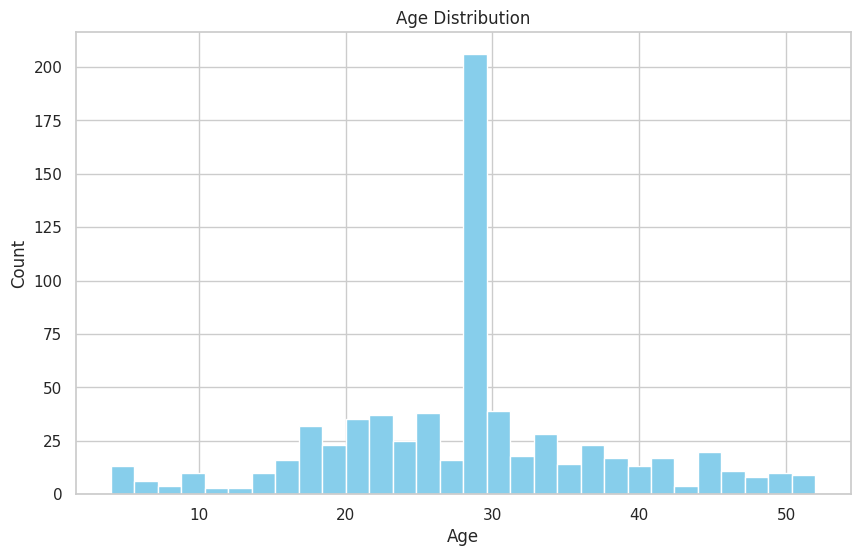

In [ ]:
# Histogram: Age distribution
df['Age'].dropna().hist(bins=30, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

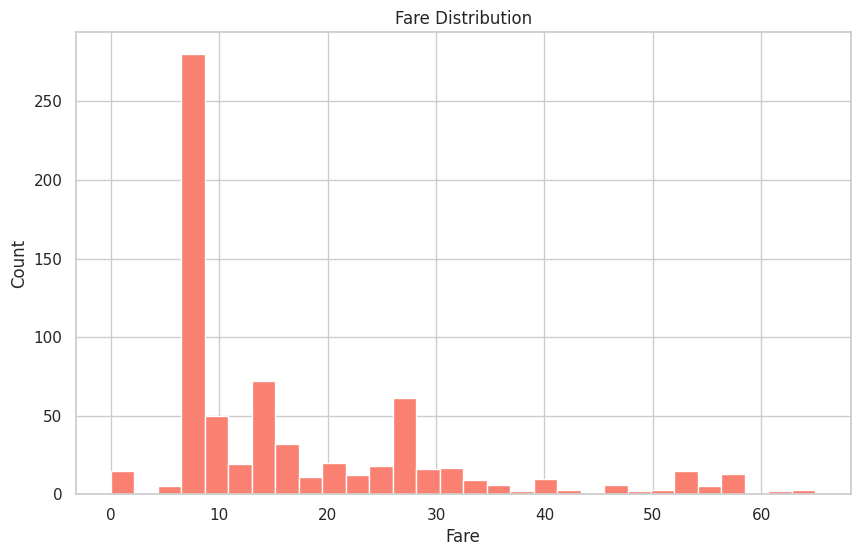

In [ ]:
# Histogram: Fare distribution
df['Fare'].dropna().hist(bins=30, color='salmon')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

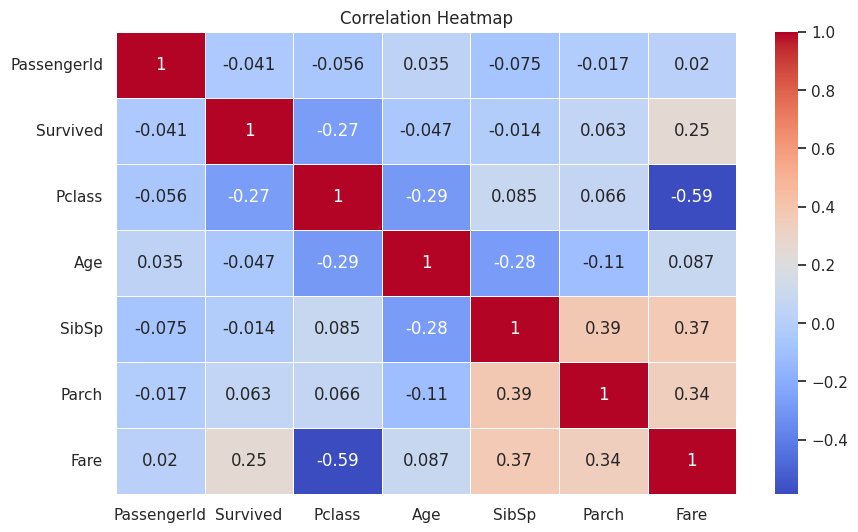

In [ ]:
# Correlation Heatmap (only numeric columns)
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Summarize Insights**

In [ ]:
from IPython.display import Markdown as md

md("""
### Summary of Insights:

- **Survival Rate**: The number of passengers who didn't survive was higher than those who did.
- **Passenger Class (Pclass)**: Most passengers were from class 3, and class 1 passengers had higher survival rates.
- **Age Distribution**: Majority of the passengers were between 20 and 40 years old.
- **Fare Distribution**: Skewed to the right, indicating a few passengers paid a very high fare.
- **Correlation**:
  - **Fare** and **Pclass** have a moderate negative correlation.
  - **Survived** shows some positive correlation with **Fare** and negative with **Pclass**.
""")



### Summary of Insights:

- **Survival Rate**: The number of passengers who didn't survive was higher than those who did.
- **Passenger Class (Pclass)**: Most passengers were from class 3, and class 1 passengers had higher survival rates.
- **Age Distribution**: Majority of the passengers were between 20 and 40 years old.
- **Fare Distribution**: Skewed to the right, indicating a few passengers paid a very high fare.
- **Correlation**:
  - **Fare** and **Pclass** have a moderate negative correlation.
  - **Survived** shows some positive correlation with **Fare** and negative with **Pclass**.


**TASK 2**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IMDB Dataset.csv to IMDB Dataset (1).csv


**Import Libraries and Load Dataset**

In [ ]:
import pandas as pd
# Load the IMDB dataset
df = pd.read_csv('IMDB Dataset.csv')
# Display first few rows
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


**Text Preprocessing**

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    words = text.split()
    # Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)
df['clean_review'] = df['review'].apply(preprocess_text)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode hoo...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...


**Feature Engineering (TF-IDF)**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_review']).toarray()
# Encode target labels (positive/negative)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['sentiment'])  # pos: 1, neg: 0

**Model Training**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

**Model Evaluation**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
# Predict on test data
y_pred = model.predict(X_test)
# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

Accuracy: 0.8561
Classification Report:
               precision    recall  f1-score   support

    Negative       0.86      0.85      0.85      4961
    Positive       0.85      0.86      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



**Sentiment Prediction Function**

In [ ]:
def predict_sentiment(text):
    processed = preprocess_text(text)
    vectorized = tfidf.transform([processed])
    pred = model.predict(vectorized)
    return le.inverse_transform(pred)[0]
# Example:
predict_sentiment("This movie was absolutely wonderful and touching.")

'positive'

**TASK 3**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


**Install Required Libraries**

In [ ]:
pip install pandas numpy scikit-learn imbalanced-learn joblib


**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import joblib

**Load and Explore the Dataset**

In [ ]:
# Load dataset
df = pd.read_csv("creditcard.csv")
# Check the shape and preview
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

    

**Check for Class Imbalance**

In [ ]:
# Count of each class
print(df['Class'].value_counts())

# Optional: visualize imbalance (requires matplotlib or seaborn)
# import seaborn as sns
# import matplotlib.pyplot as plt
# sns.countplot(x='Class', data=df)
# plt.title("Class Distribution")
# plt.show()


Class
0    284315
1       492
Name: count, dtype: int64


**Data Preprocessing (Handling Imbalanced Data)**

In [ ]:
# Split data into features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE to handle imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


**Train a Model (Random Forest)**

In [ ]:
# Initialize and train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_resampled, y_resampled)
# Save model to disk
joblib.dump(model, "fraud_model.pkl")


['fraud_model.pkl']

**Evaluate the Model**

In [ ]:
# Predict on test data
y_pred = model.predict(X_test)

# Print evaluation metrics
print("Model Evaluation Report:")
print(classification_report(y_test, y_pred, target_names=["Not Fraud", "Fraud"]))


Model Evaluation Report:
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56864
       Fraud       0.83      0.83      0.83        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



**Simple Command-Line Interface for Testing**

In [ ]:
def test_transaction():
    # Load saved model
    model = joblib.load("fraud_model.pkl")
    print("\nEnter 30 comma-separated values for a transaction (Time, V1–V28, Amount):")
    input_str = input(">> ")
    try:
        input_list = [float(x) for x in input_str.strip().split(",")]
        if len(input_list) != 30:
            raise ValueError("Expected 30 features.")

        input_array = np.array(input_list).reshape(1, -1)
        prediction = model.predict(input_array)

        result = "Fraudulent Transaction" if prediction[0] == 1 else "Legitimate Transaction"
        print(f"\nPrediction: {result}")

    except ValueError as e:
        print(f"Invalid input: {e}")


**TASK 4**

In [18]:
from google.colab import files
uploaded = files.upload()

Saving BostonHousing.csv to BostonHousing.csv


In [21]:
# Boston Housing Price Prediction (From Scratch)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

**Data Preprocessing**

In [29]:
# Load the dataset
df = pd.read_csv("BostonHousing.csv")
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

# Normalize (Z-score)
X_normalized = (X - X.mean()) / X.std()
X_normalized = X_normalized.fillna(0).replace([np.inf, -np.inf], 0)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


 **Model Implementation**

In [22]:
# Linear Regression (From Scratch)
class LinearRegressionScratch:
    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        self.theta = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b @ self.theta

In [23]:
# Decision Tree (For Random Forest / XGBoost)
class DecisionTree:
    def __init__(self, max_depth=3, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split

    def fit(self, X, y):
        data = np.c_[X, y]
        self.tree = self._build_tree(data, depth=0)

    def _split(self, data, feature_idx, threshold):
        left = data[data[:, feature_idx] <= threshold]
        right = data[data[:, feature_idx] > threshold]
        return left, right

    def _mse(self, y):
        return np.mean((y - np.mean(y)) ** 2)

    def _best_split(self, data):
        best_mse = float("inf")
        best_idx, best_thr = None, None
        for idx in range(data.shape[1] - 1):
            thresholds = np.unique(data[:, idx])
            for thr in thresholds:
                left, right = self._split(data, idx, thr)
                if len(left) < self.min_samples_split or len(right) < self.min_samples_split:
                    continue
                mse = (len(left) * self._mse(left[:, -1]) + len(right) * self._mse(right[:, -1])) / len(data)
                if mse < best_mse:
                    best_mse = mse
                    best_idx, best_thr = idx, thr
        return best_idx, best_thr

    def _build_tree(self, data, depth):
        if depth >= self.max_depth or len(data) < self.min_samples_split:
            return np.mean(data[:, -1])
        idx, thr = self._best_split(data)
        if idx is None:
            return np.mean(data[:, -1])
        left, right = self._split(data, idx, thr)
        return {
            'feature': idx,
            'threshold': thr,
            'left': self._build_tree(left, depth + 1),
            'right': self._build_tree(right, depth + 1)
        }

    def _predict(self, node, x):
        if not isinstance(node, dict):
            return node
        if x[node['feature']] <= node['threshold']:
            return self._predict(node['left'], x)
        else:
            return self._predict(node['right'], x)

    def predict(self, X):
        return np.array([self._predict(self.tree, row) for row in X])


In [24]:
# Random Forest (From Scratch)
class RandomForestScratch:
    def __init__(self, n_estimators=10, max_depth=3):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_estimators):
            idxs = np.random.choice(len(X), len(X), replace=True)
            X_sample, y_sample = X[idxs], y[idxs]
            tree = DecisionTree(max_depth=self.max_depth)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(predictions, axis=0)

In [25]:
# XGBoost (Simplified From Scratch)
class XGBoostScratch:
    def __init__(self, n_estimators=10, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        pred = np.zeros_like(y)
        for _ in range(self.n_estimators):
            residual = y - pred
            tree = DecisionTree(max_depth=self.max_depth)
            tree.fit(X, residual)
            update = tree.predict(X)
            pred += self.learning_rate * update
            self.trees.append(tree)

    def predict(self, X):
        pred = np.zeros(X.shape[0])
        for tree in self.trees:
            pred += self.learning_rate * tree.predict(X)
        return pred

 **Performance Comparison**

In [27]:
# Evaluation Function
def evaluate(model, name):
    try:
        model.fit(X_train.values, y_train.values)
        y_pred = model.predict(X_test.values)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        print(f"{name}: RMSE = {rmse:.2f}, R² = {r2:.2f}")
        return y_pred
    except Exception as e:
        print(f"Error in {name}: {e}")
# Run Evaluation
evaluate(LinearRegressionScratch(), "Linear Regression")
evaluate(RandomForestScratch(n_estimators=10), "Random Forest")
evaluate(XGBoostScratch(n_estimators=10), "XGBoost")

Linear Regression: RMSE = 5.00, R² = 0.66
Random Forest: RMSE = 3.46, R² = 0.84
XGBoost: RMSE = 8.90, R² = -0.08


array([14.68960608, 18.17044389, 11.00391901, 15.93335452, 10.78773869,
       13.93541522, 12.06044802,  9.53579796, 13.42946429, 13.93541522,
       12.06044802, 12.06044802,  7.01985452, 13.93541522, 13.93541522,
       19.18567064, 11.24850924,  7.01985452, 29.5940961 ,  9.37824479,
       13.93541522, 15.1935743 , 10.08637605, 13.9702776 ,  9.40580714,
       10.1450032 , 13.93541522,  9.03647249, 12.06044802, 13.93541522,
       12.26554286, 15.1935743 , 11.78444028, 13.10024383, 10.08637605,
       10.68684567, 21.77297694, 14.15158369, 12.26554286, 13.93541522,
       10.9394587 , 18.38264169, 29.5940961 , 13.93541522, 14.68960608,
        8.82766669, 11.5544971 , 15.1935743 , 11.5544971 , 17.24689251,
       13.93541522, 20.54219302, 11.5544971 , 16.72735727, 31.13896539,
       13.42946429,  9.864115  , 19.76317665, 14.68960608, 12.06044802,
       16.9719475 , 21.24578448, 17.52414879, 13.42946429, 16.88339404,
       11.37035738,  8.82766669, 15.1935743 , 17.52414879, 10.78

**Feature Importance**

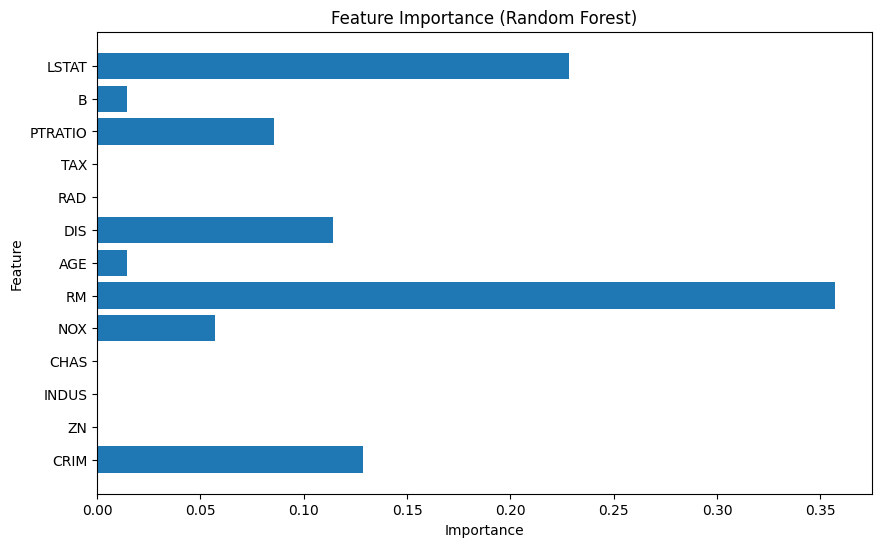

In [28]:
# Feature Importance for Random Forest
def compute_feature_importance(forest, feature_names):
    importance = np.zeros(len(feature_names))
    for tree in forest.trees:
        stack = [tree.tree]
        while stack:
            node = stack.pop()
            if isinstance(node, dict):
                importance[node['feature']] += 1
                stack.append(node['left'])
                stack.append(node['right'])
    return importance / importance.sum()

rf_model = RandomForestScratch(n_estimators=10)
rf_model.fit(X_train.values, y_train.values)
importance = compute_feature_importance(rf_model, X.columns)

plt.figure(figsize=(10,6))
plt.barh(X.columns, importance)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()